In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [4]:
pip install rarfile

In [5]:
import rarfile

# Replace 'your_file.rar' with the actual name of your RAR file
rar_file_path = '/content/drive/MyDrive/Engineering AISolutions/Chronic_Kidney_Disease.rar'

# Open the RAR file
with rarfile.RarFile(rar_file_path, 'r') as rar:
    # Get the list of files in the RAR archive
    file_list = rar.namelist()

# Display the list of files in the RAR archive
print("List of files in the RAR archive:", file_list)


List of files in the RAR archive: ['Chronic_Kidney_Disease/chronic_kidney_disease.arff', 'Chronic_Kidney_Disease/chronic_kidney_disease.info.txt', 'Chronic_Kidney_Disease/chronic_kidney_disease_full.arff', 'Chronic_Kidney_Disease/']


- The above shows that the data file which is unzipped is in the format of rar file.
- Inside that ara file we have .arff file
- Similar data is downloaded from Kaggle and is being used Below.

In [6]:
import rarfile

# Replace 'your_file.rar' with the actual name of your RAR file
rar_file_path = '/content/drive/MyDrive/Engineering AISolutions/Chronic_Kidney_Disease.rar'

# Open the RAR file
with rarfile.RarFile(rar_file_path, 'r') as rar:
    # Get the list of files in the RAR archive
    file_list = rar.namelist()

    # Read the contents of a specific file (replace 'file_inside_rar.txt' with the actual file name)
    specific_file_content = rar.read('Chronic_Kidney_Disease/chronic_kidney_disease.info.txt')

# Display the list of files and the content of the specific file
print("List of files in the RAR archive:", file_list)
print("\nContent of 'file_inside_rar.txt':\n", specific_file_content.decode('utf-8'))


List of files in the RAR archive: ['Chronic_Kidney_Disease/chronic_kidney_disease.arff', 'Chronic_Kidney_Disease/chronic_kidney_disease.info.txt', 'Chronic_Kidney_Disease/chronic_kidney_disease_full.arff', 'Chronic_Kidney_Disease/']

Content of 'file_inside_rar.txt':
 % 1. Title: Early stage of Indians Chronic Kidney Disease(CKD)
%
% 2. Source Information:
%   (a) Source: 
			Dr.P.Soundarapandian.M.D.,D.M
			(Senior Consultant Nephrologist), 
			Apollo  Hospitals, 
			Managiri,
			Madurai Main Road, 
			Karaikudi,
			Tamilnadu,
			India.

%   (b) Creator: 
			L.Jerlin Rubini(Research Scholar)
			Alagappa University,
			EmailId   :jel.jerlin@gmail.com
			ContactNo :+91-9597231281

%   (c) Guided by: 
			Dr.P.Eswaran Assistant Professor,
			Department of Computer Science and Engineering,
			Alagappa University,
			Karaikudi,
			Tamilnadu,
			India.
			Emailid:eswaranperumal@gmail.com

%   (d) Date     : July 2015
%
% 3.Relevant Information:
			age		-	age	
			bp		-	blood pressure
			sg		-

The above .txt file from the rar file is printed and giving the information about the data

            age		-	age
			bp		-	blood pressure
			sg		-	specific gravity
			al		-   	albumin
			su		-	sugar
			rbc		-	red blood cells
			pc		-	pus cell
			pcc		-	pus cell clumps
			ba		-	bacteria
			bgr		-	blood glucose random
			bu		-	blood urea
			sc		-	serum creatinine
			sod		-	sodium
			pot		-	potassium
			hemo		-	hemoglobin
			pcv		-	packed cell volume
			wc		-	white blood cell count
			rc		-	red blood cell count
			htn		-	hypertension
			dm		-	diabetes mellitus
			cad		-	coronary artery disease
			appet		-	appetite
			pe		-	pedal edema
			ane		-	anemia
			class		-	class

- This tells about every column..
- 4.Number of Instances:  400 (250 CKD, 150 notckd)
- 5.Number of Attributes: 24 + class = 25 ( 11  numeric ,14  nominal)
- Each attribute information is given whether its numerical categorical which we can also view using the python code..
- No of missing values are given
- Its a labelled data where there are only two classes.


- 6.Attribute Information :
 	1.Age(numerical)- age in years
  
 	2.Blood Pressure(numerical)-	bp in mm/Hg

 	3.Specific Gravity(nominal)-sg - (1.005,1.010,1.015,1.020,1.025)

 	4.Albumin(nominal)- al - (0,1,2,3,4,5)

 	5.Sugar(nominal)- su - (0,1,2,3,4,5)

 	6.Red Blood Cells(nominal)-rbc - (normal,abnormal)

 	7.Pus Cell (nominal)-pc - (normal,abnormal)

 	8.Pus Cell clumps(nominal)-pcc - (present,notpresent)

 	9.Bacteria(nominal)-ba  - (present,notpresent)

 	10.Blood Glucose Random(numerical)	- bgr in mgs/dl

 	11.Blood Urea(numerical)-bu in mgs/dl

 	12.Serum Creatinine(numerical)	- sc in mgs/dl

 	13.Sodium(numerical)- sod in mEq/L

 	14.Potassium(numerical)	-pot in mEq/L

 	15.Hemoglobin(numerical)-hemo in gms

 	16.Packed  Cell Volume(numerical)

 	17.White Blood Cell Count(numerical)-wc in cells/cumm

 	18.Red Blood Cell Count(numerical)	-rc in millions/cmm

 	19.Hypertension(nominal)	-htn - (yes,no)

 	20.Diabetes Mellitus(nominal)	-	dm - (yes,no)

 	21.Coronary Artery Disease(nominal)-cad - (yes,no)

 	22.Appetite(nominal)	- appet - (good,poor)

 	23.Pedal Edema(nominal)- pe - (yes,no)

 	24.Anemia(nominal)- ane - (yes,no)
  
 	25.Class (nominal)- 	class - (ckd,notckd)

7. Missing Attribute Values: Yes(Denoted by "?")



8. Class Distribution: ( 2 classes)

    		Class 	  Number of instances
    		ckd          	  250
    		notckd       	  150   


In [93]:
import pandas as pd
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


kidneyDisease_df = pd.read_csv("/content/drive/MyDrive/Engineering AISolutions/kidney_disease.csv")
kidneyDisease_df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [94]:
kidneyDisease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

- pcv(Packed Cell Volume)

- wc (White Blood Cell Count)

- rc(Red Blood Cell Count) are object type data  as per the info shown in the above dataframe.

- But actually they are numerical data which need to be converted into numerical type

- Here as they have null values we cannot convert it to integer values/Numerical values so after cleaning the data they wil be converted to Numerical type
- Lets try converting pcv,wc and rc to numerical and see what are the unwanted strings present there.


In [95]:
kidneyDisease_df['pcv'] = kidneyDisease_df['pcv'].astype(int)
kidneyDisease_df['wc'] = kidneyDisease_df['wc'].astype(int)
kidneyDisease_df['rc'] = kidneyDisease_df['rc'].astype(int)

ValueError: cannot convert float NaN to integer

- Here there are NaN values and we need to remove them to convert further to the integer or float values
- As they ar numeric we will use imputer to impute them with the median values..But before that we need to check the percentage of null values in that .
- These columns are important in classification so its important to keep it as well as the data is having only 400 rows we cannot discard the columns.

In [96]:
percentage_of_null = (kidneyDisease_df.isna().sum()/len(kidneyDisease_df))*100
percentage_of_null

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

pcv(Packed Cell Volume)

wc (White Blood Cell Count)

rc(Red Blood Cell Count) are having 17.5%, 26.25% and 32.5% null values and as they are important we cannot discard these columns. so imutation of the values with the median is a good idea.

In [97]:
imp = SimpleImputer(strategy='median')
kidney_imputed_array = imp.fit_transform(kidneyDisease_df[['pcv','wc','rc']] )
kidney_imputed_df = pd.DataFrame(kidney_imputed_array,columns =kidneyDisease_df.columns )
kidney_imputed_df


ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: '\t?'

- There are few unwanted literals which are making this imputation unsuccessful so lets check the value counts of these three columns first and otheres as well so that the replacement with the median values /modal values happen and the removal of null values happen in success.

- The above convertion is unsuccessful as we can see the error of having a literal in the column which is '\t' which needs to be removed.
- then only we can convert this.
- Also need to do the value counts for each column to check the unwanted literals in the data.


In [98]:
for i in kidneyDisease_df.columns:
  print(kidneyDisease_df[i].value_counts())

0      1
263    1
273    1
272    1
271    1
      ..
130    1
129    1
128    1
127    1
399    1
Name: id, Length: 400, dtype: int64
60.0    19
65.0    17
48.0    12
55.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: age, Length: 76, dtype: int64
80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: bp, dtype: int64
1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: sg, dtype: int64
0.0    199
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: al, dtype: int64
0.0    290
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: su, dtype: int64
normal      201
abnormal     47
Name: rbc, dtype: int64
normal      259
abnormal     76
Name: pc, dtype: int64
notpresent    354
present        42
Name: pcc, dtype: int64
notpresent    374
present        22
Name: ba, dtype: int64
99.0     10
93.0      9
100.0     9
107.0     8
131.0     6

- Now Form the above value counts of all the columns we can observe the following

- classification column object type (ckd,not ckd)
  - ckd\t -->2 rows
- cad column  object type (yes or no)
  - \tno -->2 rows
- dm column has
  - \tno --3 row
  -  \tyes --2 row
  -  space char 'yes' --> 1 row
- rc column has \t? -->1 row
- wc column has \t? --->1 row
- pcv column has \t? and \t43--->1 row and 1 row
- All these values above are in 1/2/3 rows maximum which if are in same row we can delete the entire row as it will be irrelevant data for that row classification.
- as it is only one row and all other data are present in other columns we can replace it with median values.
- Also we can see the columns al (199 rows)
and su(290 rows) are having too many values of 0.0 which is more than 50% of it and is of no use for that columns to be considered. so removing those columns.



In [99]:
kidneyDisease_df[kidneyDisease_df['classification']=='ckd\t']
#here we can just replace the correct value of ckd


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
37,37,72.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,28,6900,2.5,yes,yes,no,poor,no,yes,ckd\t
230,230,65.0,60.0,1.01,2.0,0.0,normal,abnormal,present,notpresent,...,NaN,9500,NaN,yes,yes,no,poor,no,no,ckd\t


In [100]:
kidneyDisease_df.loc[kidneyDisease_df['classification']=='ckd\t','classification']='ckd'


In [101]:
kidneyDisease_df[kidneyDisease_df['cad']=='\tno']

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
40,40,46.0,90.0,1.01,2.0,0.0,normal,abnormal,notpresent,notpresent,...,32,9100,4.1,yes,no,\tno,good,no,no,ckd
64,64,55.0,80.0,1.01,0.0,0.0,NaN,normal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,\tno,good,no,no,ckd


In [102]:
kidneyDisease_df.loc[kidneyDisease_df['cad']=='\tno','cad']='no'


In [103]:
kidneyDisease_df[(kidneyDisease_df['dm']=='\tyes')|(kidneyDisease_df['dm']=='\tno')|(kidneyDisease_df['dm']==' yes')]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
30,30,NaN,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,yes,no,good,no,no,ckd
65,65,44.0,90.0,1.01,1.0,0.0,NaN,normal,notpresent,notpresent,...,48,NaN,NaN,no,\tno,no,good,no,no,ckd
88,88,58.0,110.0,1.01,4.0,0.0,NaN,normal,notpresent,notpresent,...,NaN,13200,4.7,yes,\tyes,no,good,no,no,ckd
138,138,73.0,NaN,1.01,1.0,0.0,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,\tno,no,good,no,no,ckd
188,188,8.0,NaN,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,38,NaN,NaN,no,\tno,no,good,no,no,ckd
194,194,80.0,70.0,1.01,2.0,NaN,NaN,abnormal,notpresent,notpresent,...,NaN,NaN,NaN,yes,\tyes,no,good,no,no,ckd


In [104]:
kidneyDisease_df.loc[(kidneyDisease_df['dm']=='\tyes')|(kidneyDisease_df['dm']==' yes'),'dm']='yes'
kidneyDisease_df.loc[kidneyDisease_df['dm']=='\tno','dm']='yes'

In [105]:
kidneyDisease_df[kidneyDisease_df['wc']=='\t?']

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
185,185,4.0,NaN,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,...,34,\t?,NaN,no,no,no,good,no,no,ckd


In [106]:
#Similarly for the wc column
kidneyDisease_df_wc_temp = kidneyDisease_df[(kidneyDisease_df['wc']!='\t?')]['wc']
print(kidneyDisease_df_wc_temp)
kidneyDisease_df_wc_temp = kidneyDisease_df_wc_temp.astype(float)
median_wc = kidneyDisease_df_wc_temp.median()
kidneyDisease_df.loc[kidneyDisease_df['wc']=='\t?','wc'] = median_wc
kidneyDisease_df['wc'] = kidneyDisease_df['wc'].astype(float)

0      7800
1      6000
2      7500
3      6700
4      7300
       ... 
395    6700
396    7800
397    6600
398    7200
399    6800
Name: wc, Length: 399, dtype: object


In [107]:
kidneyDisease_df[kidneyDisease_df['rc']=='\t?']

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
162,162,59.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,37,6000.0,\t?,no,yes,no,good,no,no,ckd


In [108]:
kidneyDisease_df_rc_temp = kidneyDisease_df[(kidneyDisease_df['rc']!='\t?')]['rc']
print(kidneyDisease_df_rc_temp)
kidneyDisease_df_rc_temp = kidneyDisease_df_rc_temp.astype(float)
median_rc = kidneyDisease_df_rc_temp.median()
kidneyDisease_df.loc[kidneyDisease_df['rc']=='\t?','rc'] = median_rc
kidneyDisease_df['rc'] = kidneyDisease_df['rc'].astype(float)

0      5.2
1      NaN
2      NaN
3      3.9
4      4.6
      ... 
395    4.9
396    6.2
397    5.4
398    5.9
399    6.1
Name: rc, Length: 399, dtype: object


In [109]:
#Based onthe above data we will check the rows having \t? and othe unwanted string
kidneyDisease_df[(kidneyDisease_df['pcv']=='\t?') | (kidneyDisease_df['pcv']=='\t43')]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
66,66,67.0,70.0,1.020,2.0,0.0,abnormal,normal,notpresent,notpresent,...,\t?,NaN,NaN,yes,yes,no,good,yes,no,ckd
214,214,68.0,80.0,1.015,0.0,0.0,NaN,abnormal,notpresent,notpresent,...,\t43,4900.0,5.2,no,yes,no,good,no,no,ckd


- The above shows for the pcv column only for that column it has 2 unwanted literals. so replacing it with the median value from that column as shown below.

In [110]:
#other than the unwanted data \t? in this column is taken and the median is calculated after converting this column to float
kidneyDisease_df_pcv_temp = kidneyDisease_df[(kidneyDisease_df['pcv']!='\t?') & (kidneyDisease_df['pcv']!='\t43')]['pcv']
print(kidneyDisease_df_pcv_temp)
kidneyDisease_df_pcv_temp = kidneyDisease_df_pcv_temp.astype(float)
median_pcv = kidneyDisease_df_pcv_temp.median()
kidneyDisease_df.loc[kidneyDisease_df['pcv']=='\t?','pcv'] = median_pcv
kidneyDisease_df.loc[kidneyDisease_df['pcv']=='\t43','pcv']= median_pcv
kidneyDisease_df['pcv'] = kidneyDisease_df['pcv'].astype(float)

0      44
1      38
2      31
3      32
4      35
       ..
395    47
396    54
397    49
398    51
399    53
Name: pcv, Length: 398, dtype: object


In [111]:
kidneyDisease_df = kidneyDisease_df.drop(columns = ['su','al'])

- Now from the above codes we have removed the unwanted literals from all columns and now its time to remove the null values.

- As shown above till now those unwanted literals were there only in those rows of that particular column and no other columns in that row were wrong or had more number of NaN values. So replaced them with respective Median and Correct values based on the columns.

- Now Need to remove Nan Values as well.

- As there are only 400 rows and we need not miss out lot of data we need to keep every data and use the imputations for replacing the columns with Median and modal values as following.

In [112]:
#checking the nulllvalues
kidneyDisease_df.isna().sum()


id                  0
age                 9
bp                 12
sg                 47
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [113]:
#checking the percentage of null values.

percentage_of_null = (kidneyDisease_df.isna().sum()/len(kidneyDisease_df))*100
percentage_of_null

id                 0.00
age                2.25
bp                 3.00
sg                11.75
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [114]:
columns_more_than10PercentNull = []
for i in kidneyDisease_df.columns:
  if (kidneyDisease_df[i].isna().sum()/len(kidneyDisease_df))*100 >20:
    columns_more_than10PercentNull.append(i)
columns_more_than10PercentNull

['rbc', 'sod', 'pot', 'wc', 'rc']

- The above columns are having null values with >20 % and these columns are ['rbc', 'sod', 'pot', 'wc', 'rc']
- These provide the important information on predicion of Kidney Disease.
- Usually when we have > 10% or 20% of null values we can discard those columns if they are not impacting it on predictions. But here al the above null values columns impact on the prediction
-Serum Creatinine (sc) is a Strong Indicator
- Sodium (sod), Red Blood Cell Count (rc) are Potential Markers
- White Blood Cell Count (wc) is Indirect Impact on the prediction.
- Also Reb blood cell count (Rc) and Sodium (sod) imact in prediction of kidney disease.
- So we are not removing or dropping any of the null values instead we can replace them with Median values for numerical data and Modal values for Categorical data.


In [115]:
kidneyDisease_df

,id,age,bp,sg,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,NaN,normal,notpresent,notpresent,121.0,36.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,NaN,normal,notpresent,notpresent,NaN,18.0,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,normal,normal,notpresent,notpresent,423.0,53.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,normal,abnormal,present,notpresent,117.0,56.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,normal,normal,notpresent,notpresent,106.0,26.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,normal,normal,notpresent,notpresent,140.0,49.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,normal,normal,notpresent,notpresent,75.0,31.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,normal,normal,notpresent,notpresent,100.0,26.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,normal,normal,notpresent,notpresent,114.0,50.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


### Here we are seperating the Numeric columns and the Categorical columns to do the imputation by Median and Mode respectively

In [116]:
kidney_numeric_df = kidneyDisease_df.select_dtypes(['float64','int64'])
kidney_numeric_df

,id,age,bp,sg,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,0,48.0,80.0,1.020,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2
1,1,7.0,50.0,1.020,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN
2,2,62.0,80.0,1.010,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN
3,3,48.0,70.0,1.005,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,4,51.0,80.0,1.010,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,396,42.0,70.0,1.025,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,397,12.0,80.0,1.020,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,398,17.0,60.0,1.025,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


- Here the id column is not required as its full unique and doesnot relate to the prediction.

- We need to drop this column.

In [117]:
kidney_numeric_df = kidney_numeric_df.drop(columns = 'id')
kidney_numeric_df

,age,bp,sg,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.0,1.020,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2
1,7.0,50.0,1.020,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN
2,62.0,80.0,1.010,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN
3,48.0,70.0,1.005,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,1.010,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,42.0,70.0,1.025,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,12.0,80.0,1.020,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,17.0,60.0,1.025,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


In [118]:
imp = SimpleImputer(strategy='median')
kidney_numeric_imputed_array = imp.fit_transform(kidney_numeric_df )



In [119]:
kidney_numeric_df_cleaned = pd.DataFrame(kidney_numeric_imputed_array,columns =kidney_numeric_df.columns )
kidney_numeric_df_cleaned

,age,bp,sg,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.0,1.020,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2
1,7.0,50.0,1.020,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8
2,62.0,80.0,1.010,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8
3,48.0,70.0,1.005,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,1.010,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,42.0,70.0,1.025,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,12.0,80.0,1.020,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,17.0,60.0,1.025,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


In [120]:
kidney_categorical_df = kidneyDisease_df.select_dtypes([object])
kidney_categorical_df

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [121]:
imp = SimpleImputer(strategy='most_frequent')
kidney_categorical_imputed_array = imp.fit_transform(kidney_categorical_df )


kidney_categorical_imputed_array

array([['normal', 'normal', 'notpresent', ..., 'no', 'no', 'ckd'],
       ['normal', 'normal', 'notpresent', ..., 'no', 'no', 'ckd'],
       ['normal', 'normal', 'notpresent', ..., 'no', 'yes', 'ckd'],
       ...,
       ['normal', 'normal', 'notpresent', ..., 'no', 'no', 'notckd'],
       ['normal', 'normal', 'notpresent', ..., 'no', 'no', 'notckd'],
       ['normal', 'normal', 'notpresent', ..., 'no', 'no', 'notckd']],
      dtype=object)

In [122]:
kidney_categorical_df_cleaned = pd.DataFrame(kidney_categorical_imputed_array,columns =kidney_categorical_df.columns )
kidney_categorical_df_cleaned

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [123]:
kidney_categorical_df_cleaned.isnull().sum()

rbc               0
pc                0
pcc               0
ba                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [124]:
kidney_cleaned_data= pd.concat([kidney_numeric_df_cleaned,kidney_categorical_df_cleaned],axis = 1)
kidney_cleaned_data

,age,bp,sg,bgr,bu,sc,sod,pot,hemo,pcv,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,121.0,36.0,1.2,138.0,4.4,15.4,44.0,...,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,121.0,18.0,0.8,138.0,4.4,11.3,38.0,...,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,423.0,53.0,1.8,138.0,4.4,9.6,31.0,...,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,117.0,56.0,3.8,111.0,2.5,11.2,32.0,...,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,106.0,26.0,1.4,138.0,4.4,11.6,35.0,...,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,140.0,49.0,0.5,150.0,4.9,15.7,47.0,...,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,75.0,31.0,1.2,141.0,3.5,16.5,54.0,...,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,100.0,26.0,0.6,137.0,4.4,15.8,49.0,...,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,114.0,50.0,1.0,135.0,4.9,14.2,51.0,...,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [125]:
kidney_cleaned_data.isnull().sum()

age               0
bp                0
sg                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
rbc               0
pc                0
pcc               0
ba                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

- The cleaning is done by initially seperating the numerical and categorical data.
- The categorical Null values are replaced with Modal values
- The Numeriical Null values are replced with Median values.
- Used the SimpleImputer Library to replace the Missing values.
- The output of the imputer gives the array format which needs to be converted to DataFrame and add the columns.
- Concatenated the imputed cleaned data and made it to a single Dataframe.
- There are no null values here now.

#### Now Need to Check the Skewness of the data by plotting the box plots or histograms for Numeric data and Understand its distributions.


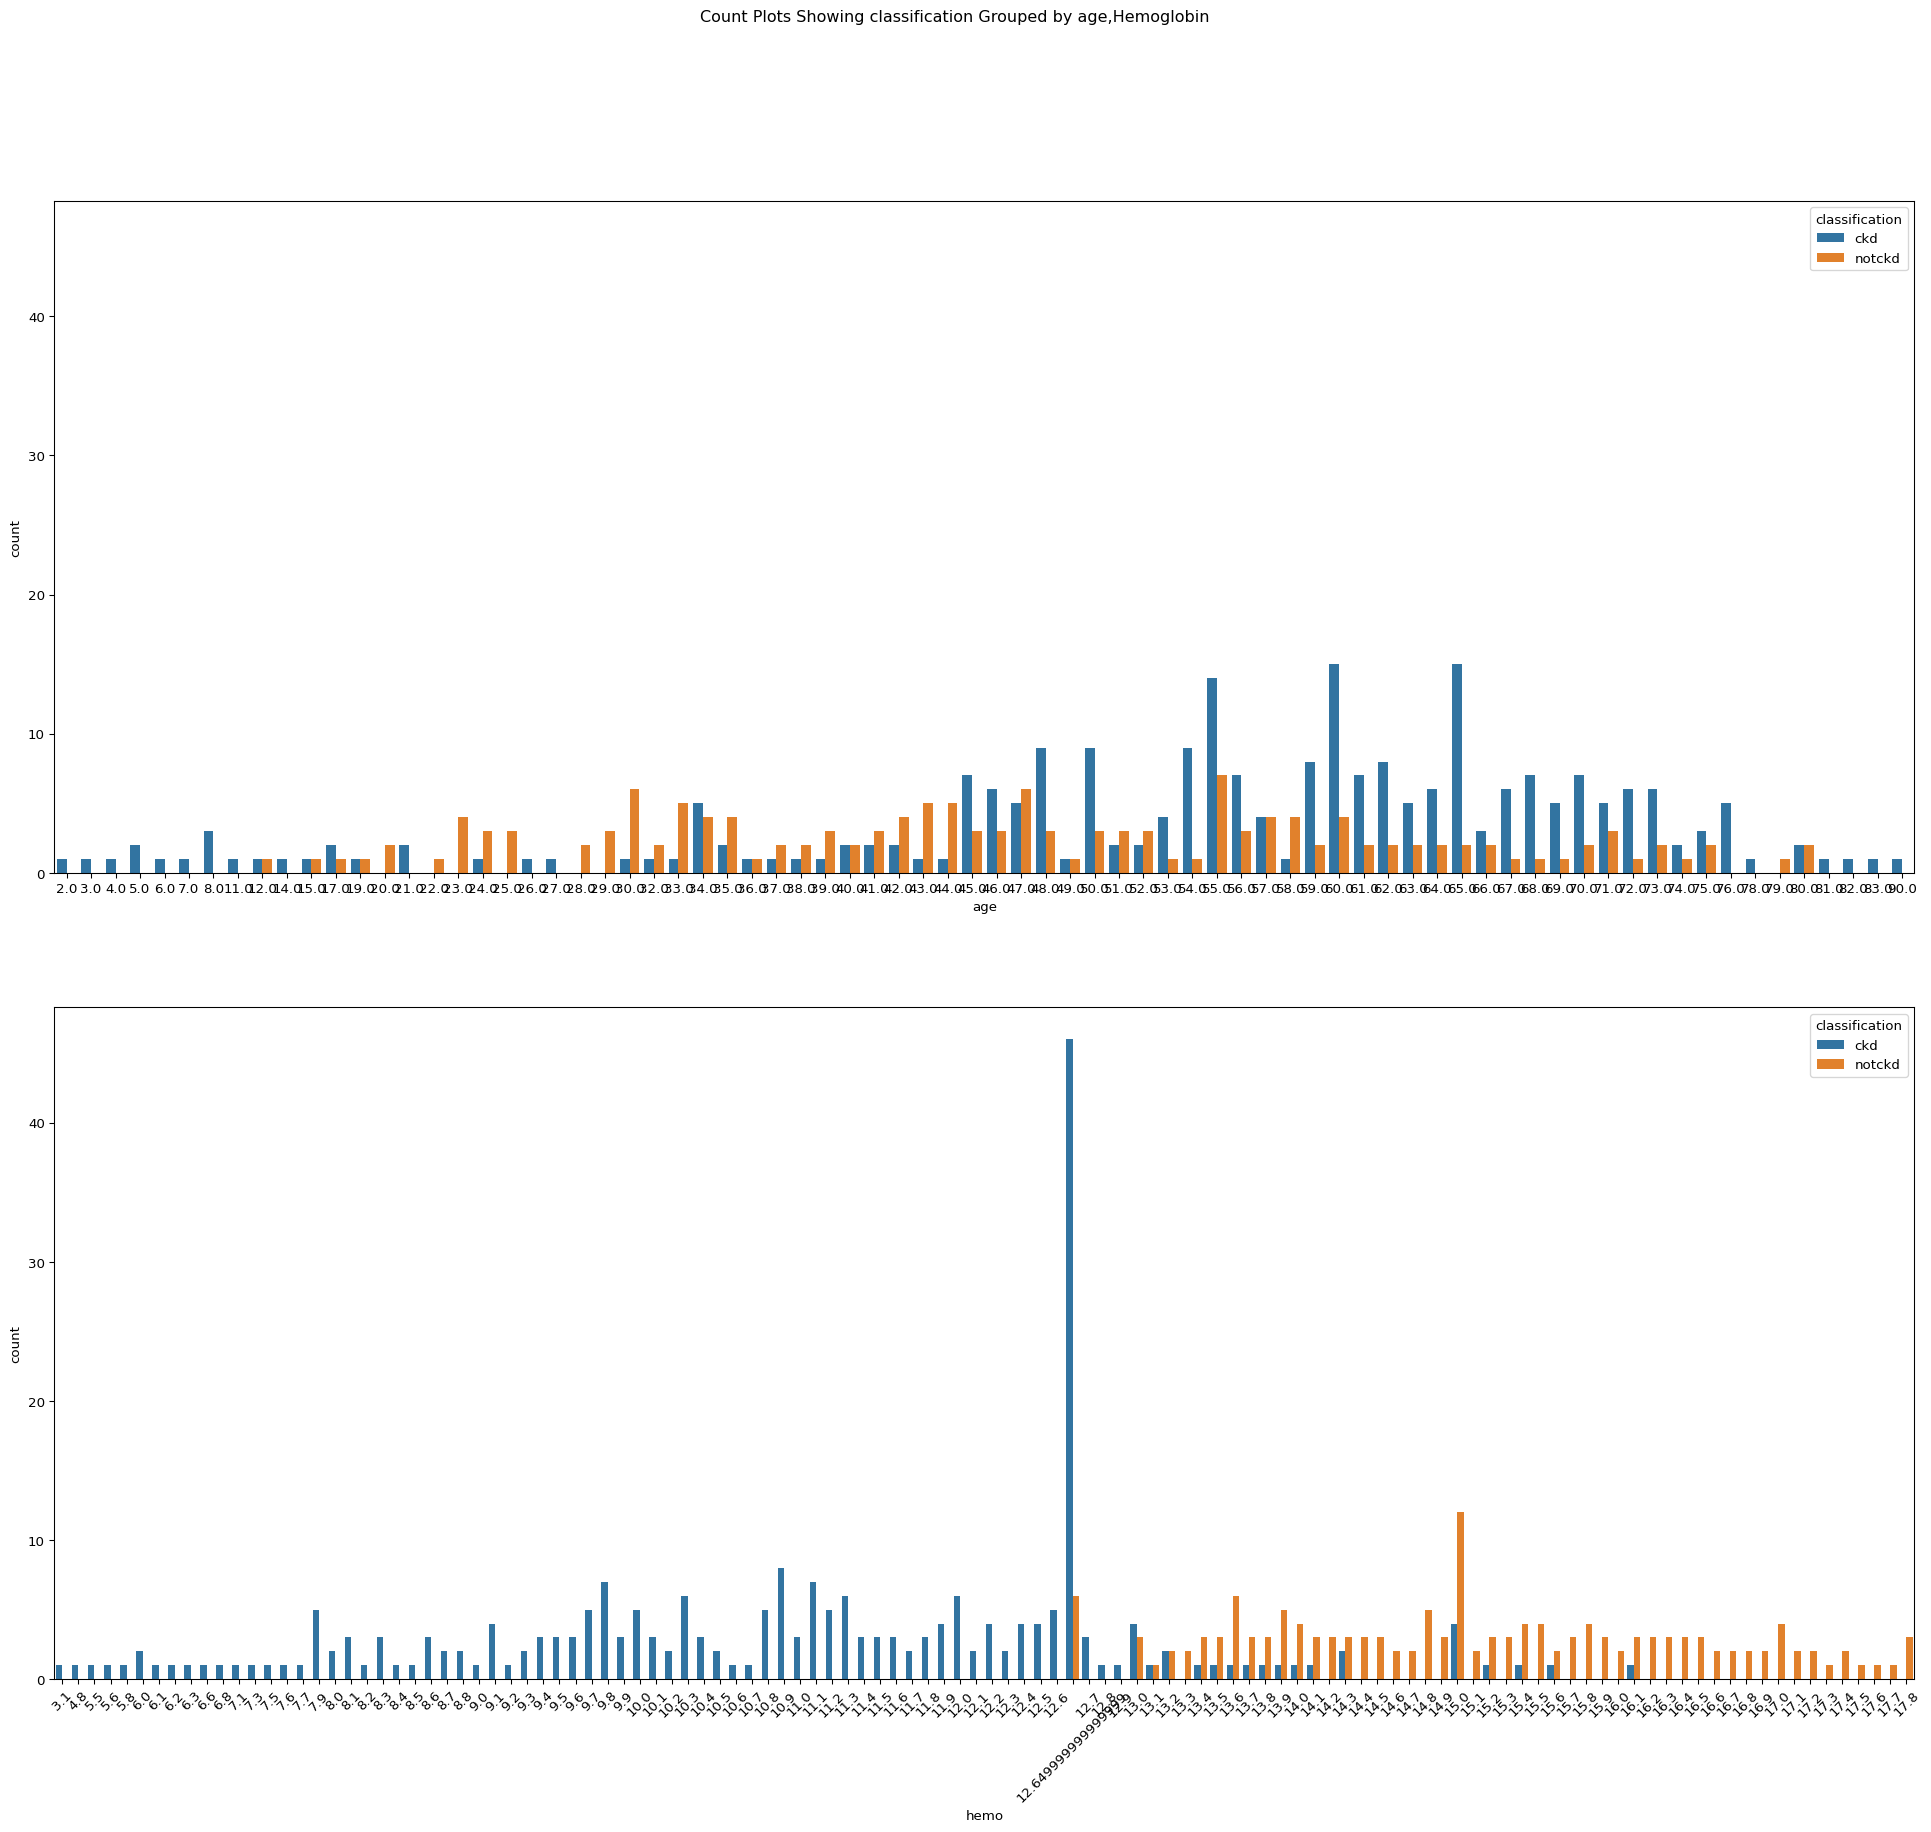

In [126]:
fig1, axis1 = plt.subplots(nrows = 2, ncols = 1, figsize = (25, 20), dpi = 96, sharey = True)
sns.countplot(x = 'age', data = kidney_cleaned_data, hue = 'classification', ax = axis1[0])

sns.countplot(x = 'hemo', data = kidney_cleaned_data, hue = 'classification', ax = axis1[1])
fig1.suptitle('Count Plots Showing classification Grouped by age,Hemoglobin')
plt.xticks(rotation = 45)
plt.show()


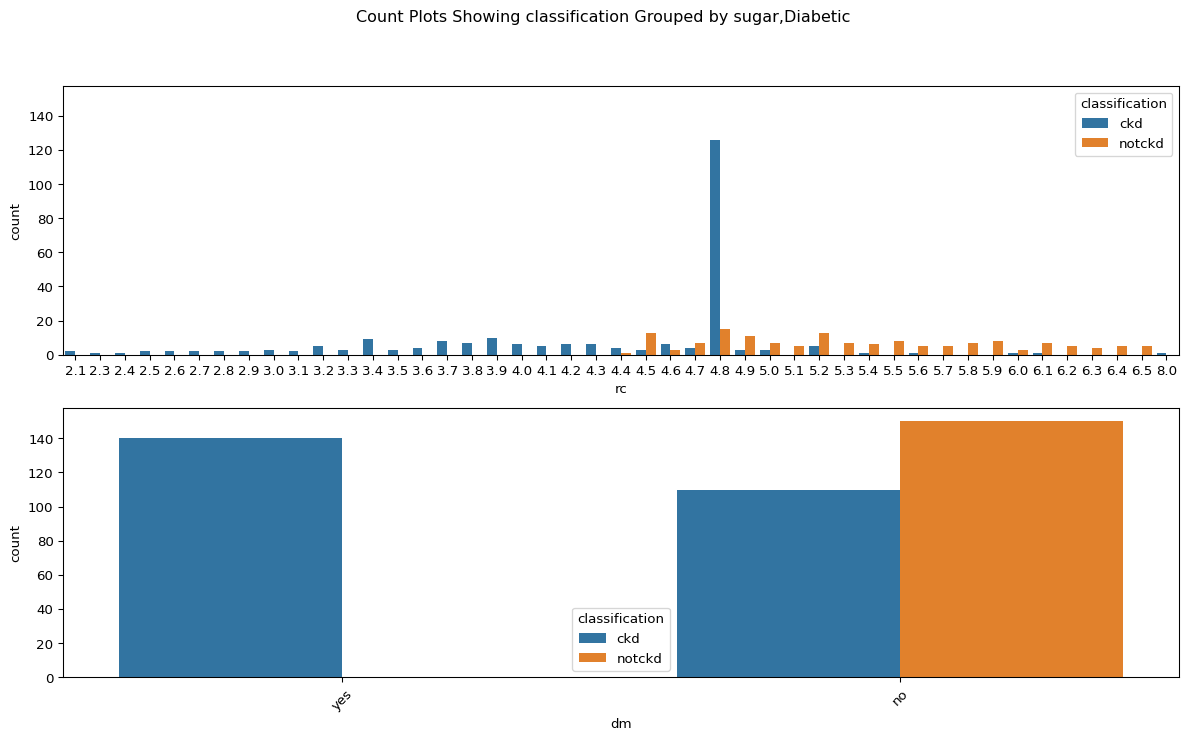

In [127]:
fig1, axis1 = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 8), dpi = 96, sharey = True)
sns.countplot(x = 'rc', data = kidney_cleaned_data, hue = 'classification', ax = axis1[0])

sns.countplot(x = 'dm', data = kidney_cleaned_data, hue = 'classification', ax = axis1[1])
fig1.suptitle('Count Plots Showing classification Grouped by sugar,Diabetic')
plt.xticks(rotation = 45)
plt.show()


- Checking all the columns are having the correct distributions
- Plotting box plots for all columns and checking the outliers
- plotting it only for the non categorical/Numerical data.


In [128]:
kidney_cleaned_data

,age,bp,sg,bgr,bu,sc,sod,pot,hemo,pcv,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,121.0,36.0,1.2,138.0,4.4,15.4,44.0,...,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,121.0,18.0,0.8,138.0,4.4,11.3,38.0,...,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,423.0,53.0,1.8,138.0,4.4,9.6,31.0,...,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,117.0,56.0,3.8,111.0,2.5,11.2,32.0,...,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,106.0,26.0,1.4,138.0,4.4,11.6,35.0,...,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,140.0,49.0,0.5,150.0,4.9,15.7,47.0,...,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,75.0,31.0,1.2,141.0,3.5,16.5,54.0,...,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,100.0,26.0,0.6,137.0,4.4,15.8,49.0,...,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,114.0,50.0,1.0,135.0,4.9,14.2,51.0,...,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [129]:
for i in kidney_cleaned_data:
  print(kidney_cleaned_data[i].value_counts())

55.0    21
60.0    19
65.0    17
48.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: age, Length: 76, dtype: int64
80.0     128
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: bp, dtype: int64
1.020    153
1.010     84
1.025     81
1.015     75
1.005      7
Name: sg, dtype: int64
121.0    48
99.0     10
100.0     9
93.0      9
107.0     8
         ..
288.0     1
182.0     1
84.0      1
256.0     1
226.0     1
Name: bgr, Length: 146, dtype: int64
42.0     24
46.0     15
25.0     13
19.0     11
40.0     10
         ..
165.0     1
322.0     1
114.0     1
235.0     1
145.0     1
Name: bu, Length: 118, dtype: int64
1.2     40
1.3     25
1.1     24
0.5     23
1.0     23
        ..
3.8      1
12.2     1
9.2      1
13.8     1
0.4      1
Name: sc, Length: 84, dtype: int64
138.0    107
135.0     40
140.0     25
141.0     22
139.0     21
142.0     20
137.0     19
150.0     17
136.0

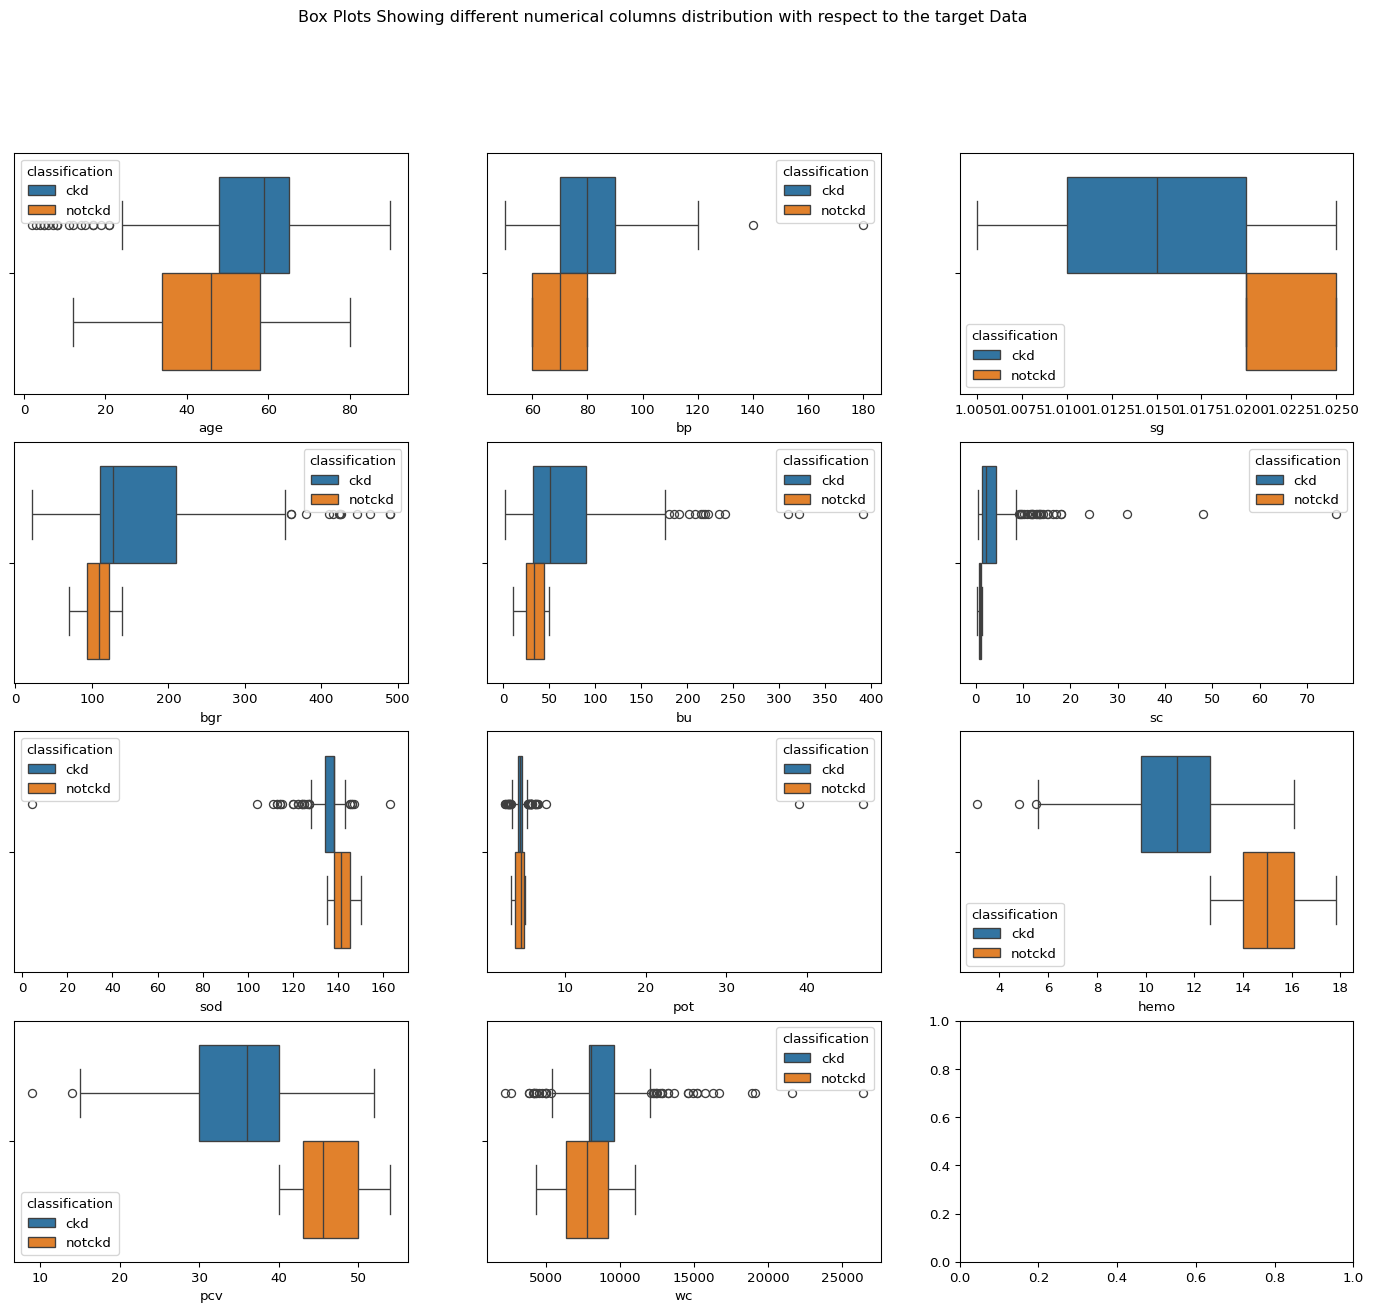

In [130]:

fig2, axis2 = plt.subplots(nrows = 4, ncols = 3, figsize = (18, 15), dpi = 96, sharey = False)
sns.boxplot(x = 'age', hue = kidney_categorical_df['classification'], data = kidney_numeric_df_cleaned, ax = axis2[0, 0])
print()
sns.boxplot(x = 'bp', hue = kidney_categorical_df['classification'], data = kidney_numeric_df_cleaned, ax = axis2[0, 1])
sns.boxplot(x = 'sg',  hue = kidney_categorical_df['classification'], data = kidney_numeric_df_cleaned, ax = axis2[0, 2])
sns.boxplot(x = 'bgr', hue = kidney_categorical_df['classification'], data = kidney_numeric_df_cleaned, ax = axis2[1, 0])
sns.boxplot(x = 'bu',hue = kidney_categorical_df['classification'], data = kidney_numeric_df_cleaned, ax = axis2[1, 1])
sns.boxplot(x = 'sc', hue = kidney_categorical_df['classification'], data = kidney_numeric_df_cleaned, ax = axis2[1, 2])
sns.boxplot(x = 'sod', hue = kidney_categorical_df['classification'], data = kidney_numeric_df_cleaned, ax = axis2[2, 0])
sns.boxplot(x = 'pot', hue = kidney_categorical_df['classification'], data = kidney_numeric_df_cleaned, ax = axis2[2, 1])
sns.boxplot(x = 'hemo',  hue = kidney_categorical_df['classification'], data = kidney_numeric_df_cleaned, ax = axis2[2, 2])
sns.boxplot(x = 'pcv', hue = kidney_categorical_df['classification'], data = kidney_numeric_df_cleaned, ax = axis2[3, 0])
sns.boxplot(x = 'wc', hue = kidney_categorical_df['classification'], data = kidney_numeric_df_cleaned, ax = axis2[3, 1])
fig2.suptitle('Box Plots Showing different numerical columns distribution with respect to the target Data')
plt.show()

- From the plot we can observe the age column for cronic Kidney disease type more than the not having cronic kidney disease. It had more outliers.
- median values for the ckd people is more than the non ckd people based on age and slightly left skewed data.

- similarly the columns which have more outliers are bgr,bu,sc,sod,pot,and wc.
- right skewed data are in the columns bp,bgr,bu,sc,pot,wc and left skewed data are hemp,sg,pcv.

To remove the skewness and also to remove the outliers we can scale the data.

In [131]:
kidney_cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   bgr             400 non-null    float64
 4   bu              400 non-null    float64
 5   sc              400 non-null    float64
 6   sod             400 non-null    float64
 7   pot             400 non-null    float64
 8   hemo            400 non-null    float64
 9   pcv             400 non-null    float64
 10  wc              400 non-null    float64
 11  rc              400 non-null    float64
 12  rbc             400 non-null    object 
 13  pc              400 non-null    object 
 14  pcc             400 non-null    object 
 15  ba              400 non-null    object 
 16  htn             400 non-null    object 
 17  dm              400 non-null    obj

## Here the label Encoding is done for the categorical columns

In [132]:
label_encoder = preprocessing.LabelEncoder()
for i in range(12,23):
  kidney_cleaned_data.iloc[:,i] = label_encoder.fit_transform(kidney_cleaned_data.iloc[:,i])

<ipython-input-132-aff702591cfd>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  kidney_cleaned_data.iloc[:,i] = label_encoder.fit_transform(kidney_cleaned_data.iloc[:,i])
<ipython-input-132-aff702591cfd>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  kidney_cleaned_data.iloc[:,i] = label_encoder.fit_transform(kidney_cleaned_data.iloc[:,i])
<ipython-input-132-aff702591cfd>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old b

In [133]:
kidney_cleaned_data.iloc[:,12:23]
#After label encoding the categorical columns


,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,1,1,0,0,1,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,1,0,1,0
3,1,0,1,0,1,0,0,1,1,1,0
4,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,1,0,0,0,0,0,0,0,0,1
396,1,1,0,0,0,0,0,0,0,0,1
397,1,1,0,0,0,0,0,0,0,0,1
398,1,1,0,0,0,0,0,0,0,0,1


The following shows how he values in the categorical column is encoded

rbc--> normal--1 and abnormal--0

pc--> normal--1 and abnormal--0

pcc--> present--1 and notpresent--0

ba--> present--1 and notpresent--0

htn--> yes--1 and no--0

dm--> yes--1 and no--0

cad--> yes--1 and no--0

appet--> poor--1 and good--0

pe--> yes--1 and no--0

ane--> yes--1 and no--0

classification-->ckd--0 notckd--1

## Here have changed the categorical columns to integer

In [134]:
kidney_cleaned_data.iloc[:,12:23] = kidney_cleaned_data.iloc[:,12:23].astype(int)
kidney_cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   bgr             400 non-null    float64
 4   bu              400 non-null    float64
 5   sc              400 non-null    float64
 6   sod             400 non-null    float64
 7   pot             400 non-null    float64
 8   hemo            400 non-null    float64
 9   pcv             400 non-null    float64
 10  wc              400 non-null    float64
 11  rc              400 non-null    float64
 12  rbc             400 non-null    int64  
 13  pc              400 non-null    int64  
 14  pcc             400 non-null    int64  
 15  ba              400 non-null    int64  
 16  htn             400 non-null    int64  
 17  dm              400 non-null    int

### Need to do scaling for the non Labelencoded data and plot the graphs for the removal of skewness and Normalizing the data

In [135]:
#Before scaling the data the numerical columns values are shown below
kidney_cleaned_data.iloc[:,:12]

,age,bp,sg,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.0,1.020,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2
1,7.0,50.0,1.020,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8
2,62.0,80.0,1.010,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8
3,48.0,70.0,1.005,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,1.010,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,42.0,70.0,1.025,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,12.0,80.0,1.020,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,17.0,60.0,1.025,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


In [136]:
std_scaler = StandardScaler()

kidney_cleaned_data_array = std_scaler.fit_transform(kidney_cleaned_data.iloc[:,:12] .to_numpy())
kidney_cleaned_data.iloc[:,:12] = pd.DataFrame(kidney_cleaned_data_array, columns=kidney_cleaned_data.iloc[:,:12].columns)
kidney_cleaned_data.iloc[:,:12]

,age,bp,sg,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,-0.210031,0.254214,0.421486,-0.320122,-0.419451,-0.319668,0.040104,-0.062903,1.053226,0.604309,-0.197314,0.550044
1,-2.627234,-1.972476,0.421486,-0.320122,-0.784315,-0.390819,0.040104,-0.062903,-0.457965,-0.131905,-0.909782,0.074073
2,0.615355,0.254214,-1.421074,3.697618,-0.074858,-0.212942,0.040104,-0.062903,-1.084556,-0.990821,-0.316059,0.074073
3,-0.210031,-0.488016,-2.342354,-0.373337,-0.014047,0.142813,-2.896333,-0.737181,-0.494823,-0.868119,-0.632711,-0.996862
4,-0.033163,0.254214,-1.421074,-0.519679,-0.622154,-0.284093,0.040104,-0.062903,-0.347390,-0.500012,-0.395222,-0.163913
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.202662,0.254214,0.421486,-0.067350,-0.155939,-0.444182,1.345187,0.114539,1.163801,0.972416,-0.632711,0.193066
396,-0.563768,-0.488016,1.342766,-0.932096,-0.520803,-0.319668,0.366375,-0.382298,1.458668,1.831331,-0.197314,1.739973
397,-2.332453,0.254214,0.421486,-0.599501,-0.622154,-0.426395,-0.068653,-0.062903,1.200660,1.217820,-0.672293,0.788030
398,-2.037673,-1.230246,1.342766,-0.413248,-0.135669,-0.355244,-0.286167,0.114539,0.610927,1.463225,-0.434803,1.382994


In [142]:
kidney_cleaned_data

,age,bp,sg,bgr,bu,sc,sod,pot,hemo,pcv,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,-0.210031,0.254214,0.421486,-0.320122,-0.419451,-0.319668,0.040104,-0.062903,1.053226,0.604309,...,1,0,0,1,1,0,0,0,0,0
1,-2.627234,-1.972476,0.421486,-0.320122,-0.784315,-0.390819,0.040104,-0.062903,-0.457965,-0.131905,...,1,0,0,0,0,0,0,0,0,0
2,0.615355,0.254214,-1.421074,3.697618,-0.074858,-0.212942,0.040104,-0.062903,-1.084556,-0.990821,...,1,0,0,0,1,0,1,0,1,0
3,-0.210031,-0.488016,-2.342354,-0.373337,-0.014047,0.142813,-2.896333,-0.737181,-0.494823,-0.868119,...,0,1,0,1,0,0,1,1,1,0
4,-0.033163,0.254214,-1.421074,-0.519679,-0.622154,-0.284093,0.040104,-0.062903,-0.347390,-0.500012,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.202662,0.254214,0.421486,-0.067350,-0.155939,-0.444182,1.345187,0.114539,1.163801,0.972416,...,1,0,0,0,0,0,0,0,0,1
396,-0.563768,-0.488016,1.342766,-0.932096,-0.520803,-0.319668,0.366375,-0.382298,1.458668,1.831331,...,1,0,0,0,0,0,0,0,0,1
397,-2.332453,0.254214,0.421486,-0.599501,-0.622154,-0.426395,-0.068653,-0.062903,1.200660,1.217820,...,1,0,0,0,0,0,0,0,0,1
398,-2.037673,-1.230246,1.342766,-0.413248,-0.135669,-0.355244,-0.286167,0.114539,0.610927,1.463225,...,1,0,0,0,0,0,0,0,0,1


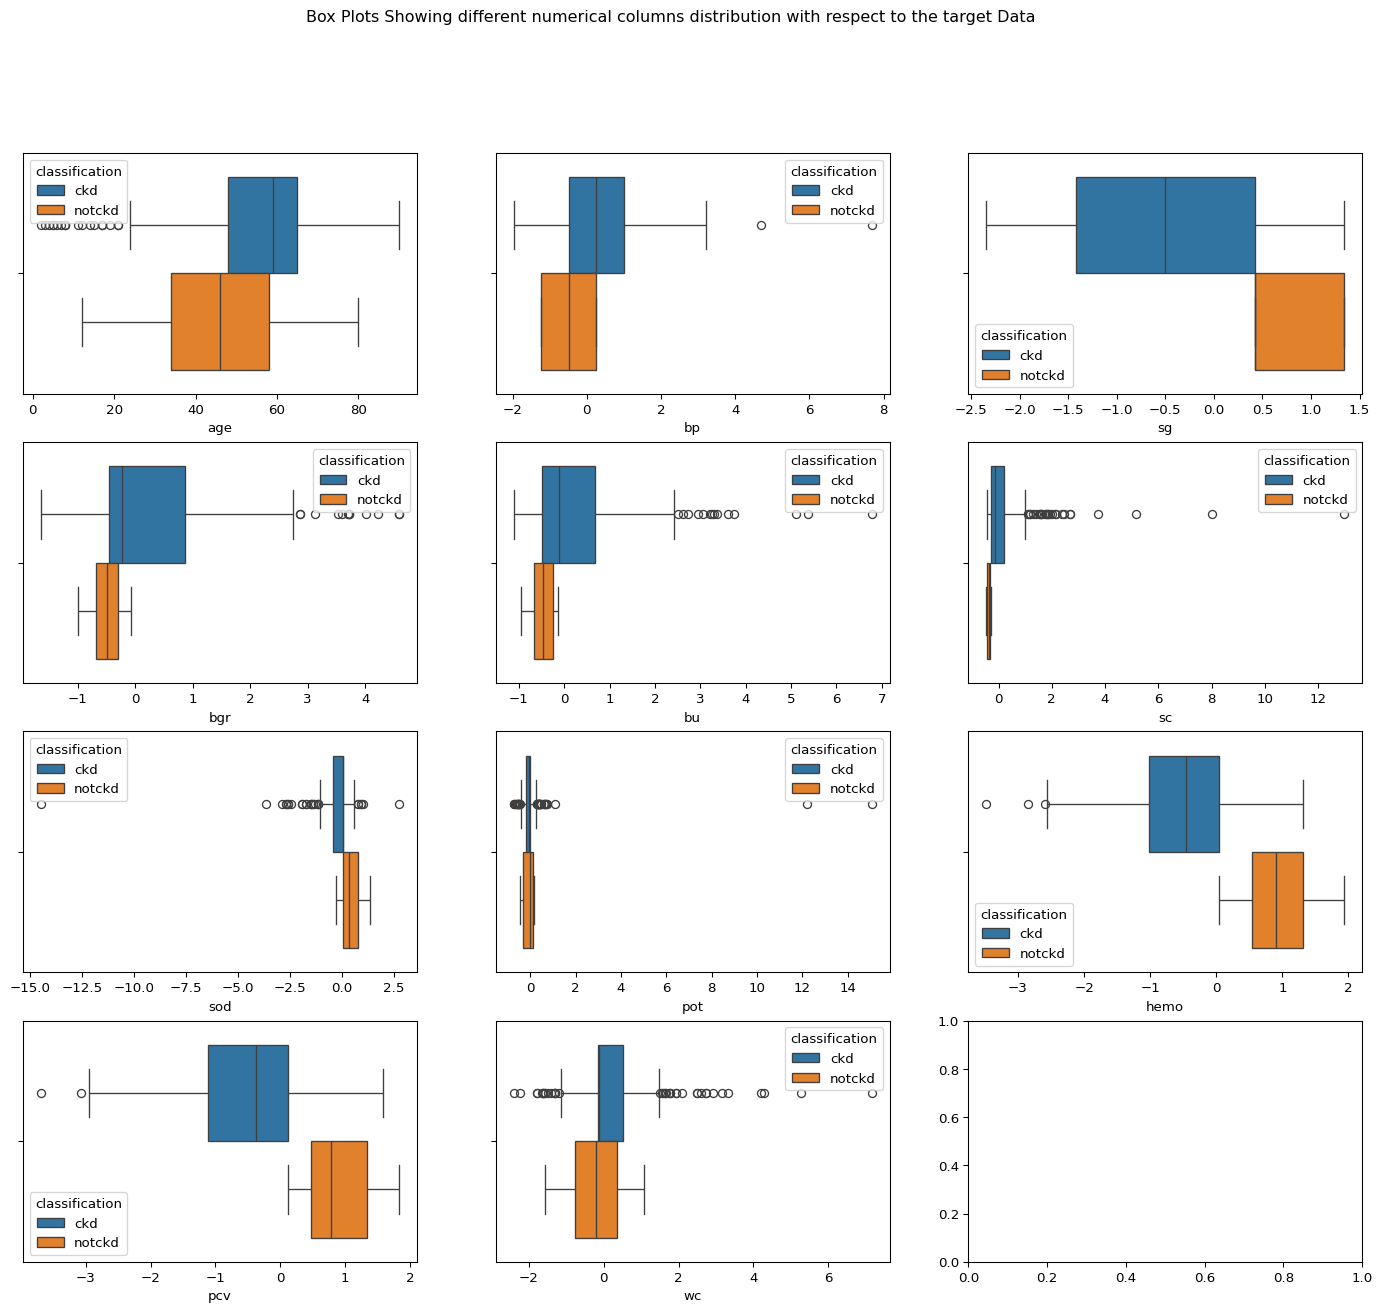

In [137]:

fig2, axis2 = plt.subplots(nrows = 4, ncols = 3, figsize = (18, 15), dpi = 96, sharey = False)
sns.boxplot(x = 'age', hue = kidney_categorical_df['classification'], data = kidney_numeric_df_cleaned, ax = axis2[0, 0])
print()
sns.boxplot(x = 'bp', hue = kidney_categorical_df['classification'], data = kidney_cleaned_data, ax = axis2[0, 1])
sns.boxplot(x = 'sg',  hue = kidney_categorical_df['classification'], data = kidney_cleaned_data, ax = axis2[0, 2])
sns.boxplot(x = 'bgr', hue = kidney_categorical_df['classification'], data = kidney_cleaned_data, ax = axis2[1, 0])
sns.boxplot(x = 'bu',hue = kidney_categorical_df['classification'], data = kidney_cleaned_data, ax = axis2[1, 1])
sns.boxplot(x = 'sc', hue = kidney_categorical_df['classification'], data = kidney_cleaned_data, ax = axis2[1, 2])
sns.boxplot(x = 'sod', hue = kidney_categorical_df['classification'], data = kidney_cleaned_data, ax = axis2[2, 0])
sns.boxplot(x = 'pot', hue = kidney_categorical_df['classification'], data = kidney_cleaned_data, ax = axis2[2, 1])
sns.boxplot(x = 'hemo',  hue = kidney_categorical_df['classification'], data = kidney_cleaned_data, ax = axis2[2, 2])
sns.boxplot(x = 'pcv', hue = kidney_categorical_df['classification'], data = kidney_cleaned_data, ax = axis2[3, 0])
sns.boxplot(x = 'wc', hue = kidney_categorical_df['classification'], data = kidney_cleaned_data, ax = axis2[3, 1])
fig2.suptitle('Box Plots Showing different numerical columns distribution with respect to the target Data')
plt.show()

- Scaling has not removed the outliers here for the numerical columns
- Also we can check on the histogram for the distribution for each of the numerical data



<ipython-input-138-9a5a6472cff3>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(kidney_cleaned_data[column])
<ipython-input-138-9a5a6472cff3>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(kidney_cleaned_data[column])
<ipython-input-138-9a5a6472cff3>:9: UserWarning: 

`distplot` is a depreca

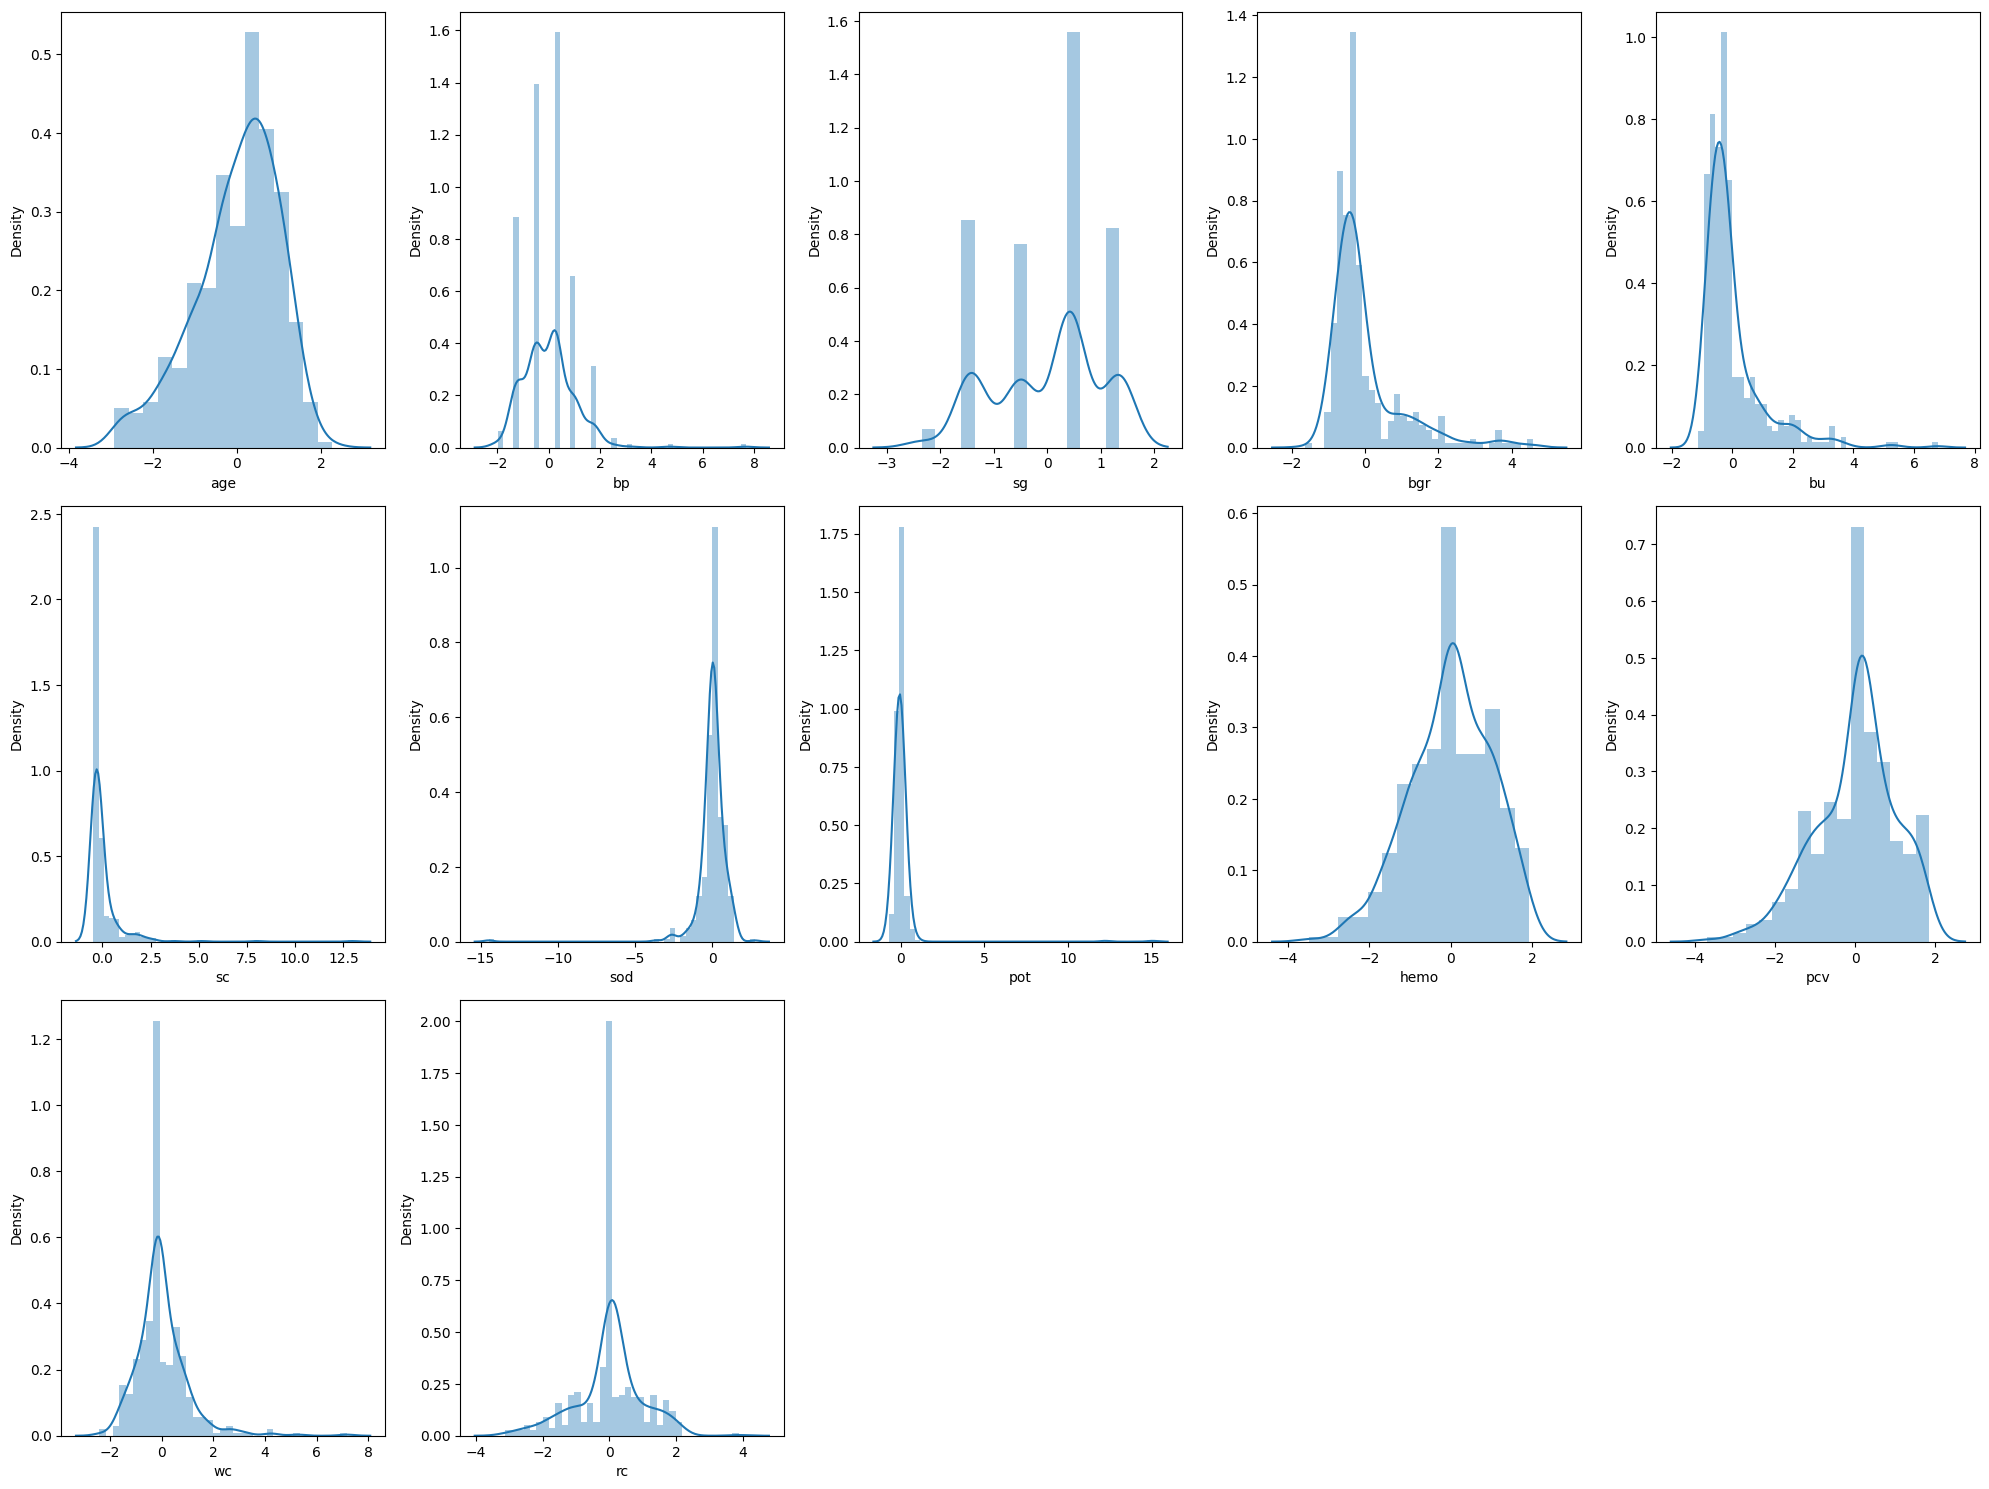

In [138]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in kidney_cleaned_data.iloc[:,:12].columns:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(kidney_cleaned_data[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

- As seen above the data is scaled and most of the histograms in the numerical columns are in the -3 to +3 standard Deviations.
- So further no nee to remove outliers as the data is small and if we remove outliers we might loose the important data.
- Now the next step is to split the data into train and test and train the models


In [147]:
ind_col = [col for col in kidney_cleaned_data.columns if col != 'classification']
dep_col = 'classification'

X = kidney_cleaned_data[ind_col]
y = kidney_cleaned_data[dep_col]

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [149]:
from sklearn.metrics import classification_report
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 1.0 

Confusion Matrix :- 
[[72  0]
 [ 0 48]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [150]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1200 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _v

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [154]:
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'}
1.0


## Using the Grid Search CV method and using Hyper tuning parameters checking the train and the test accuracy of the models

- Best parameters are

{'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'}

Best score is --> 1.0

In [159]:
dtc_grid = grid_search_dtc.best_estimator_
grid_search_dtc_acc = accuracy_score(y_test, dtc_grid.predict(X_test))
print(f"Training Accuracy of Decision Tree Classifier is using GridSearchCV {accuracy_score(y_train, dtc_grid.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {grid_search_dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc_grid.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc_grid.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is using GridSearchCV 0.8178571428571428
Test Accuracy of Decision Tree Classifier is 0.8166666666666667 

Confusion Matrix :- 
[[50 22]
 [ 0 48]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.69      0.82        72
           1       0.69      1.00      0.81        48

    accuracy                           0.82       120
   macro avg       0.84      0.85      0.82       120
weighted avg       0.87      0.82      0.82       120



In [158]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy',
                                max_depth = 11, max_features = 'auto',
                                min_samples_leaf = 2, min_samples_split = 2, n_estimators = 130)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 1.0 

Confusion Matrix :- 
[[72  0]
 [ 0 48]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



- Based on the above three models which are fit
  - Decision tree classifier
  - Decision Tree classifier with Grid SearchCV method
  - Random Forest classifier

- Each of them have been fit the cleaned and scaled data.
- The Decision tree classifier and RandomForestClassifier are showing accuracy score and f1 scores as 1.0 for train and test both which is an overfit.
- The Decision tree classifier using GridSearchCV is giving the accuracy of
Training Accuracy is 81.7857142%
Test Accuracy is 81.66667%
which seems good training given to the machince using Hyper parameters with the best parameters used as

{'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'}

- So Finally doing the pickle and dump() function to zip this model which is not overfit and giving goes accuracies and f1 scores.



In [162]:
print("exporting the model")
f= open("DTCGridSearCV.pk",'wb')
pickle.dump(dtc_grid,f)
f.close()

exporting the model


In [164]:
import zipfile
zipfile.ZipFile("DTCGridSearCV.zip",mode = 'w').write("DTCGridSearCV.pk")

In [165]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc

!pip install pypandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet ruby-rubygems
  ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fo

## References
- https://www.geeksforgeeks.org/how-to-scale-pandas-dataframe-columns/. took standard scaling techniques
- https://olympus.mygreatlearning.com/courses/109578/pages/1-dot-17-developing-id3-using-python?module_item_id=5378388
from this took the model building techniques on decision tree
- https://www.kaggle.com/code/niteshyadav3103/chronic-kidney-disease-prediction-98-accuracy worked on few visualization techniques.
- worked on the random forest ad gridsearchCV method for model building